In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import joblib
import os




In [ ]:
# 남자 이미지 데이터 불러오기
data = np.load('manDF.npy')
array1 = data

In [ ]:
array1.shape

(13446, 54401)

In [ ]:
asdf=pd.DataFrame(array1)

In [ ]:
asdf

,0,1,2,3,4,5,6,7,8,9,...,54391,54392,54393,54394,54395,54396,54397,54398,54399,54400
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,1,0,0,4,2,4,...,0,3,0,0,6,1,4,0,4,1
2,0,0,0,0,0,3,5,1,0,1,...,4,12,0,0,1,7,0,0,0,1
3,0,0,0,0,5,1,0,0,7,0,...,5,0,1,2,1,3,2,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13441,3,0,8,0,13,7,0,0,6,8,...,120,138,135,134,121,132,122,133,134,6
13442,0,0,0,0,0,0,0,0,0,0,...,69,72,73,72,74,81,83,80,76,6
13443,0,0,0,0,0,0,0,0,0,0,...,155,139,109,96,108,102,109,98,76,6
13444,0,0,0,0,0,0,0,0,0,0,...,139,137,142,148,153,161,169,171,172,6


In [ ]:
# 메모리 줄이기 위해서 INT16으로 변경
for col in asdf.columns:
    asdf[col] = asdf[col].astype('int16')

In [ ]:
# 데이터 분할 (train-test split)
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(asdf, test_size=0.2,stratify=asdf[54400],random_state=10)


In [ ]:
from autogluon.tabular import TabularPredictor
# 정규화는 AutoGluon 내부에서 자동으로 수행됩니다.

predictor = TabularPredictor(label=54400,problem_type='multiclass')

predictor.fit(train_data=train_data, presets= 'medium_quality',hyperparameters={'RF': {}}) # 최적의 모델 선택 및 하이퍼파라미터 튜닝을 위해 'best_quality' 설정
# 최적의 모델 선택 및 하이퍼파라미터 튜닝을 위해 'best_quality' 설정
# presets: ['best_quality', 'high_quality', 'good_quality', 'medium_quality', 'optimize_for_deployment', 'ignore_text', 'interpretable', 'experimental_best_quality', 'experimental_extreme_quality', 'experimental_zeroshot_hpo', 'experimental_zeroshot_hpo_hybrid']


results = predictor.fit_summary()
print(results)

No path specified. Models will be saved in: "AutogluonModels\ag-20230910_002443"
Presets specified: ['medium_quality']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230910_002443"
AutoGluon Version:  0.8.2
Python Version:     3.9.17
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   91.53 GB / 247.62 GB (37.0%)
Train Data Rows:    10756
Train Data Columns: 54400
Label Column: 54400
Preprocessing data ...
c:\Users\KDP19\anaconda3\envs\mypython\lib\site-packages\autogluon\tabular\learner\default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_n

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         RandomForest   0.704461       0.632168  432.846721                0.632168         432.846721            1       True          1
1  WeightedEnsemble_L2   0.704461       0.644533  432.846721                0.012365           0.000000            2       True          2
Number of models trained: 2
Types of models trained:
{'RFModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('int', []) : 54400 | ['0', '1', '2', '3', '4', ...]
*** End of fit() summary ***
{'model_types': {'RandomForest': 'RFModel', 'WeightedEnsemble_L2': 'WeightedEnsembleModel'}, 'model_performance': {'RandomForest': 0.7044609665427509, 'WeightedEnsemble_L2': 0.7044609665427509}, 'model_best': 'WeightedEnsemble_

c:\Users\KDP19\anaconda3\envs\mypython\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [ ]:
# 분류
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report

In [ ]:
# 위 아래 비교해서 과적합인지 과소적합인지 적합인지 판단

print('================test================')
test_y_ = test_data[54400]
pred_y_ = predictor.predict(test_data)

print(accuracy_score(test_y_, pred_y_))
print(classification_report(test_y_,pred_y_))

print('================train================')
train_y_ = train_data[54400]
pred_train_y_ = predictor.predict(train_data)

print(accuracy_score(train_y_, pred_train_y_))
print(classification_report(train_y_,pred_train_y_))

================test================
0.6955390334572491
              precision    recall  f1-score   support

           1       0.82      0.55      0.66       382
           2       0.73      0.69      0.71       471
           3       0.68      0.81      0.74       493
           4       0.66      0.75      0.70       474
           5       0.68      0.64      0.66       438
           6       0.68      0.70      0.69       432

    accuracy                           0.70      2690
   macro avg       0.71      0.69      0.69      2690
weighted avg       0.70      0.70      0.69      2690

================train================
0.9704351059873559
              precision    recall  f1-score   support

           1       0.99      0.96      0.98      1530
           2       0.97      0.97      0.97      1881
           3       0.96      0.98      0.97      1971
           4       0.96      0.97      0.97      1894
           5       0.97      0.96      0.97      1752
           6       

In [ ]:
data2 = np.load('womanDF.npy')
array2 = data2

In [ ]:
array2.shape

(7896, 54401)

In [ ]:
asdf2=pd.DataFrame(array2)

In [ ]:
asdf2

,0,1,2,3,4,5,6,7,8,9,...,54391,54392,54393,54394,54395,54396,54397,54398,54399,54400
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,2,0,0,0,...,0,3,0,1,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,4,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,0,0,0,2,1,4,4,2,5,2,...,6,0,4,2,4,2,2,1,0,6
7892,0,6,3,0,0,0,0,0,0,11,...,0,2,0,0,1,0,0,0,0,6
7893,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,6
7894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [ ]:
for col in asdf2.columns:
    asdf2[col] = asdf2[col].astype('int16')

In [ ]:
asdf2.iloc[0,0]

0

In [ ]:
# 데이터 분할 (train-test split)
from sklearn.model_selection import train_test_split

train_data2, test_data2 = train_test_split(asdf2, test_size=0.2,stratify=asdf2[54400],random_state=10)


In [ ]:
from autogluon.tabular import TabularPredictor
# 정규화는 AutoGluon 내부에서 자동으로 수행됩니다.

predictor2 = TabularPredictor(label=54400,problem_type='multiclass')

predictor2.fit(train_data=train_data2, presets= 'medium_quality',hyperparameters={'RF': {}}) # 최적의 모델 선택 및 하이퍼파라미터 튜닝을 위해 'best_quality' 설정
# 최적의 모델 선택 및 하이퍼파라미터 튜닝을 위해 'best_quality' 설정
# presets: ['best_quality', 'high_quality', 'good_quality', 'medium_quality', 'optimize_for_deployment', 'ignore_text', 'interpretable', 'experimental_best_quality', 'experimental_extreme_quality', 'experimental_zeroshot_hpo', 'experimental_zeroshot_hpo_hybrid']


results2 = predictor2.fit_summary()
print(results2)

No path specified. Models will be saved in: "AutogluonModels\ag-20230910_013022"
Presets specified: ['medium_quality']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230910_013022"
AutoGluon Version:  0.8.2
Python Version:     3.9.17
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   86.85 GB / 247.62 GB (35.1%)
Train Data Rows:    6316
Train Data Columns: 54400
Label Column: 54400
Preprocessing data ...
c:\Users\KDP19\anaconda3\envs\mypython\lib\site-packages\autogluon\tabular\learner\default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2   0.610759       0.418293  440.164858                0.000000           0.010082            2       True          2
1         RandomForest   0.610759       0.418293  440.154776                0.418293         440.154776            1       True          1
Number of models trained: 2
Types of models trained:
{'RFModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('int', []) : 54400 | ['0', '1', '2', '3', '4', ...]
*** End of fit() summary ***
{'model_types': {'RandomForest': 'RFModel', 'WeightedEnsemble_L2': 'WeightedEnsembleModel'}, 'model_performance': {'RandomForest': 0.6107594936708861, 'WeightedEnsemble_L2': 0.6107594936708861}, 'model_best': 'WeightedEnsemble_

c:\Users\KDP19\anaconda3\envs\mypython\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [ ]:
# 분류
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report

In [ ]:
# 위 아래 비교해서 과적합인지 과소적합인지 적합인지 판단

print('================test================')
test_y_2 = test_data2[54400]
pred_y_2 = predictor.predict(test_data2)

print(accuracy_score(test_y_2, pred_y_2))
print(classification_report(test_y_2,pred_y_2))

print('================train================')
train_y_2 = train_data2[54400]
pred_train_y_2 = predictor2.predict(train_data2)

print(accuracy_score(train_y_2, pred_train_y_2))
print(classification_report(train_y_2,pred_train_y_2))

================test================
0.17025316455696202
              precision    recall  f1-score   support

           1       0.11      0.03      0.05       229
           2       0.15      0.19      0.17       229
           3       0.15      0.23      0.18       293
           4       0.26      0.30      0.28       277
           5       0.17      0.16      0.17       336
           6       0.10      0.07      0.08       216

    accuracy                           0.17      1580
   macro avg       0.16      0.16      0.15      1580
weighted avg       0.16      0.17      0.16      1580

================train================
0.9449018366054465
              precision    recall  f1-score   support

           1       0.89      0.87      0.88       915
           2       0.88      0.88      0.88       915
           3       0.96      0.98      0.97      1171
           4       0.97      0.98      0.97      1107
           5       0.96      0.98      0.97      1344
           6      

In [ ]:
from rembg import remove
def userImg(img_value):
    filename=img_value
    # [2] 이미지 배경제거 후 사이즈 조절
    dsize_=(340,160)
    arr = np.frombuffer(filename, np.int16)
    org = cv2.imdecode(arr, cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(org, dsize_)
    output=remove(img)
    gray = cv2.cvtColor(output, cv2.COLOR_RGBA2GRAY)
    gray=gray.reshape(-1)

    return gray


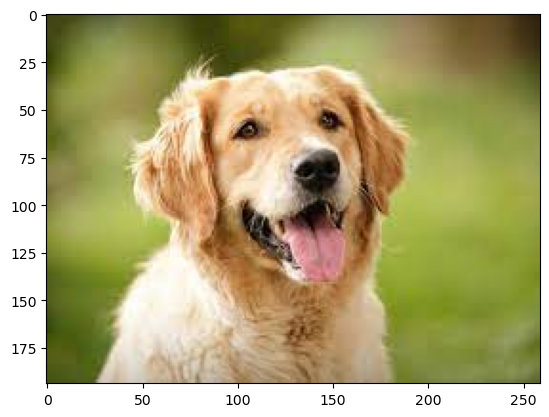

In [ ]:
filename=r'..\images\golden.jpg'
golden=cv2.imread(filename)
golden_rgb = cv2.cvtColor(golden, cv2.COLOR_BGR2RGB)
plt.imshow(golden_rgb)
plt.show()

In [ ]:
filename=r'..\images\golden.jpg'
dsize_=(340,160)
golden=cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
img=cv2.resize(golden, dsize_)
output=remove(img)
gray = cv2.cvtColor(output, cv2.COLOR_RGBA2GRAY)
gray=gray.reshape(-1)
qqqq=pd.DataFrame([gray])
qqqq

,0,1,2,3,4,5,6,7,8,9,...,54390,54391,54392,54393,54394,54395,54396,54397,54398,54399
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
current_dir = os.getcwd()
man_pklfile = os.path.join(current_dir, "cgi-bin/man.pkl")
man_clf = joblib.load(man_pklfile)

In [ ]:
type(man_clf.predict(qqqq)[0])

numpy.int16